In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [34]:
def plot_correlation(data):
    '''Plot correlation's matrix to know dependency between features'''
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('correlation.png')  

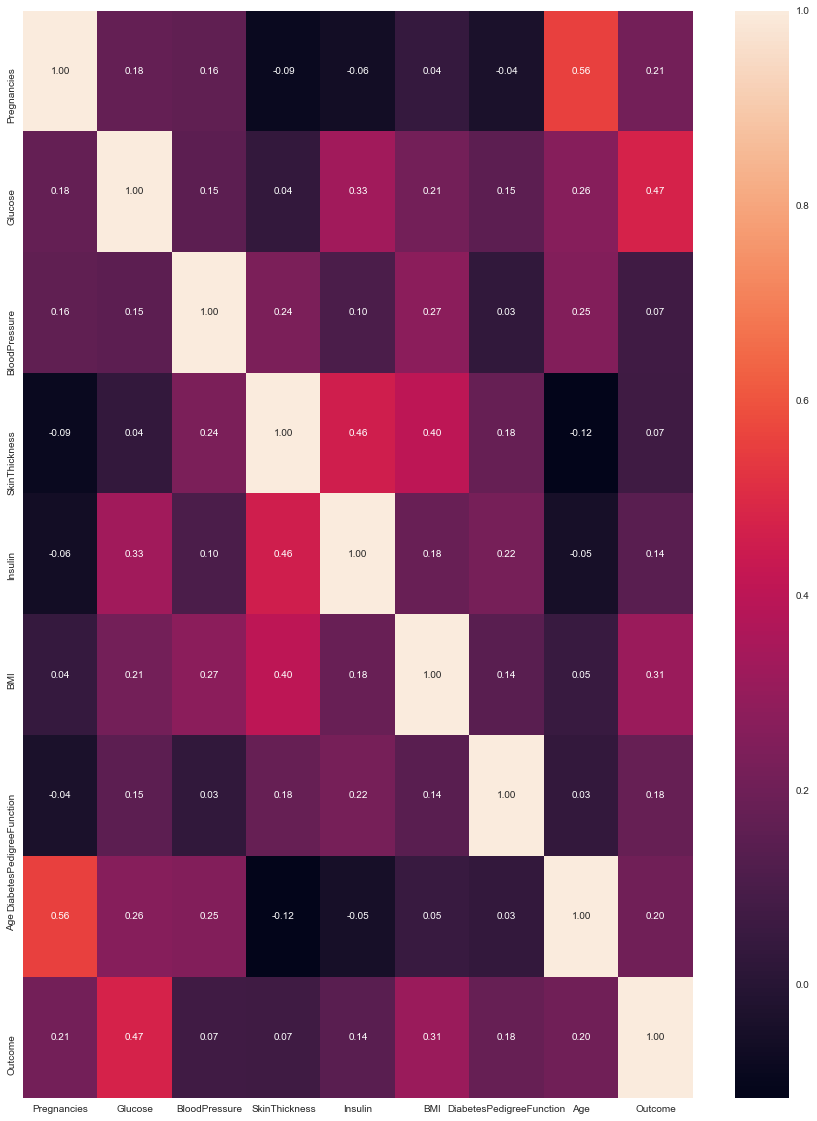

(576, 8) (576, 1)


In [36]:
dfx = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dfy = pd.read_csv('./Training Data/Diabetes_YTrain.csv')

data = pd.concat([dfx,dfy],axis=1,join='inner').sort_index()
plot_correlation(data)

dfx = dfx.values
dfy = dfy.values

print(dfx.shape,dfy.shape)

In [37]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
5              7      100              0              0        0  30.0   
6              4      110             66              0        0  31.9   
7              1      111             86             19        0  30.1   
8              3      169             74             19      125  29.9   
9              1       71             62              0        0  21.8   
10             2      101             58             35       90  21.8   
11            10      115              0              0        0   0.0   
12             3       96             

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprec

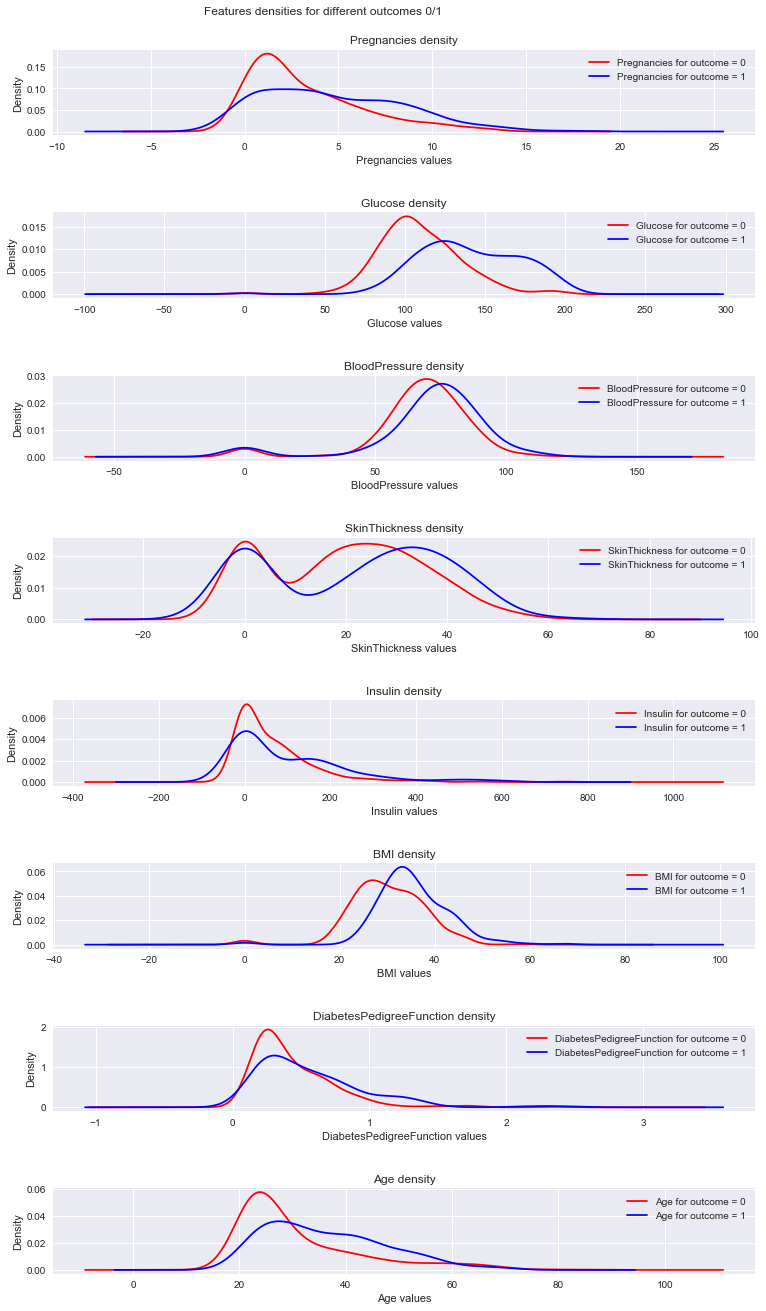

In [38]:
def plot_densities(data):
    '''Plot features densities depending on the outcome value'''
    #change figure size to fit all densities correctly
    rcParams['figure.figsize'] = 15,20
    
    #sepearting data on the basis of Outcome
    outcome_0 = data[data['Outcome']==0 ]
    outcome_1 = data[data['Outcome']==1 ]
    
    #init figure
    fig,axs = plt.subplots(8,1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95, wspace = 0.2, hspace = 0.9)
    
    #plot densities for outcomes
    for column_name in names[:-1]:
        ax = axs[names.index(column_name)]
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, sharex=False, color='red', legend=True, label=column_name+' for outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, sharex=False, color='blue', legend=True, label=column_name+' for outcome = 1')
        
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
        
    plt.show()
    fig.savefig('densities.png')
    

names  = list( data.columns )
plot_densities(data)

In [10]:
X = dfx
Y = dfy.reshape((576,))
print(Y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

(576, 8)


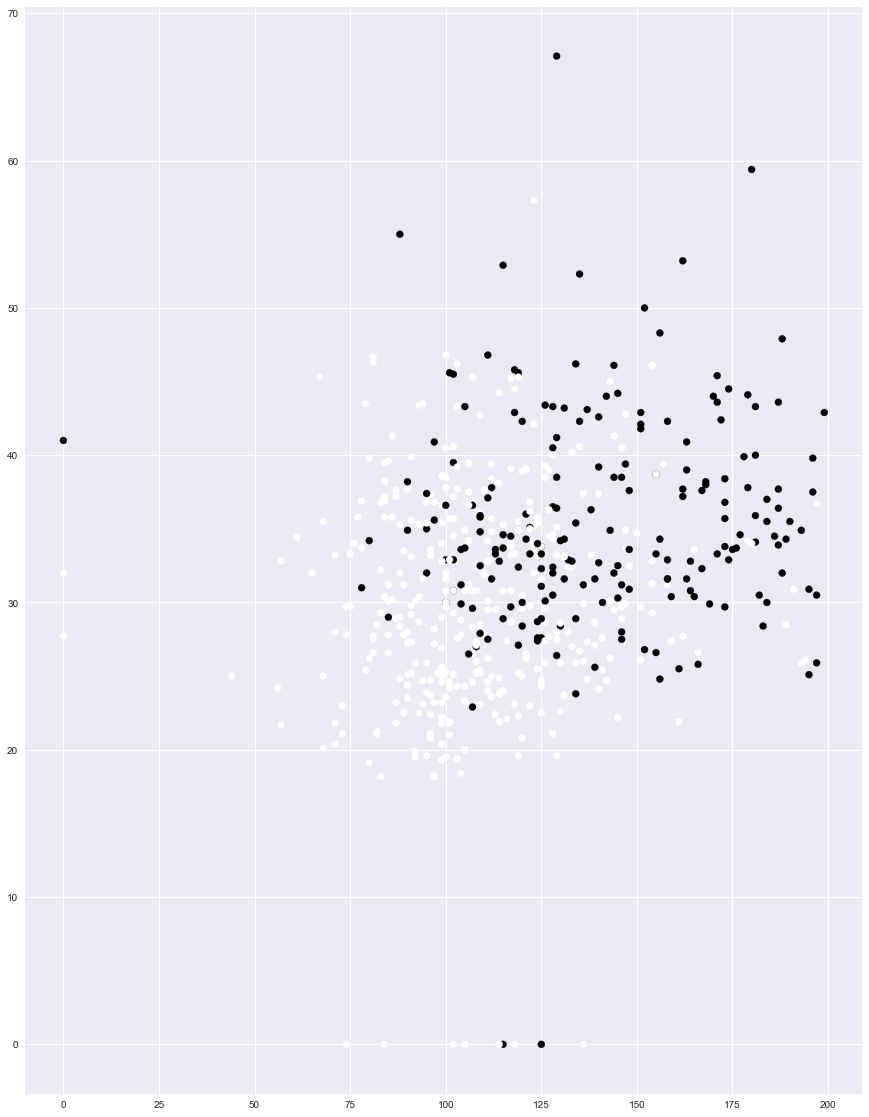

In [43]:
print(dfx.shape)
dataToPlot = np.concatenate((dfx[:,1:2],dfx[:,5:6]),axis=1)
# print(dataToPlot.shape)
# print(dataToPlot)

plt.scatter(dataToPlot[:,0],dataToPlot[:,1],c=Y)
plt.show()

In [11]:
def distance(X1,X2):
    return np.sqrt(sum((X1 - X2)**2))

In [19]:
def knn(X,Y,queryPoint,k=7):
    
    Predvals = []
    for i in range(X.shape[0]):
        d = distance(queryPoint,X[i])
        Predvals.append((d,Y[i]))
        
        
    Predvals = sorted(Predvals)
    Predvals = Predvals[:k]
    newPreds = np.unique(Predvals,return_counts = True)
    
    index = newPreds[1].argmax()
    pred = newPreds[0][index]
    
    return pred

In [20]:
X_test = pd.read_csv('./Testing Data/Diabetes_Xtest.csv')
X_test = X_test.values

In [21]:
prediction = knn(X,Y,X_test[0])
print(prediction)

1.0


In [44]:
finalPrediction = {'prediction':[]}

for i in range(X_test.shape[0]):
    finalPrediction['prediction'].append(knn(X,Y,X_test[i]))
    
df = pd.DataFrame(finalPrediction)
print(df)
# df.to_csv('Diabetes_Ypred.csv',sep='\t', encoding='utf-8',index=False)

     prediction
0           1.0
1           0.0
2           0.0
3           0.0
4           0.0
5           1.0
6           1.0
7           0.0
8           0.0
9           0.0
10          1.0
11          0.0
12          1.0
13          0.0
14          0.0
15          0.0
16          0.0
17          1.0
18          1.0
19          1.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          1.0
27          0.0
28          0.0
29          0.0
..          ...
162         0.0
163         1.0
164         0.0
165         0.0
166         0.0
167         0.0
168         0.0
169         0.0
170         0.0
171         0.0
172         0.0
173         1.0
174         0.0
175         0.0
176         0.0
177         0.0
178         1.0
179         1.0
180         0.0
181         0.0
182         1.0
183         1.0
184         1.0
185         1.0
186         0.0
187         1.0
188         1.0
189         1.0
190         1.0
191         0.0

[192 ro

In [45]:
FinalPredData = list(finalPrediction['prediction'])
print(FinalPredData)

[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [46]:
FinalPredData = np.array(FinalPredData)
FinalPredData = np.unique(FinalPredData,return_counts=True)
print(FinalPredData)

(array([0., 1.]), array([123,  69], dtype=int64))


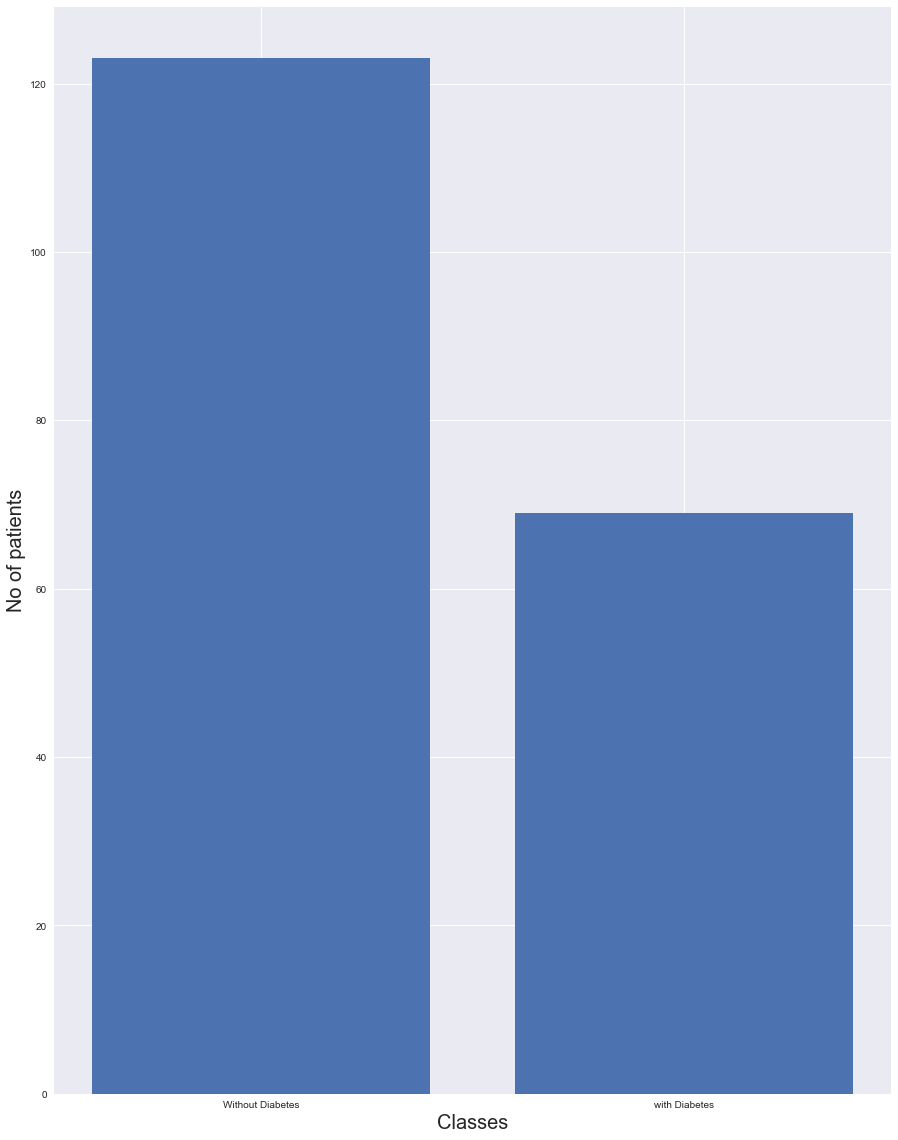

In [56]:
Name = ['Without Diabetes','with Diabetes']
fig = plt.figure()
plt.bar(Name, FinalPredData[1])
plt.ylabel('No of patients',fontsize=20)
plt.xlabel('Classes',fontsize=20)
plt.show()
fig.savefig('FinalBar.png')